### PROBLEM STATEMENT

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors. 

Before the data team can build any models, we need to clean and preprocess the data to get useful features out of raw fields.
The data at the end of this case study should be able to make sense out of the raw data and help the data science team to build forecasting models on it. 

So, the objective of this case study is to understand the raw fileds, analyze and visualize the fileds to get important insights from it. On the top of this EDA part, we aim to prepare the data for a machine learning model by doing feature engineering steps.

### IMPORT LIBRARIES

In [534]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind,ttest_rel
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

### IMPORTING DATASET

In [535]:
orig_df = pd.read_csv('delhivery_data.csv')
df = orig_df.copy()

In [536]:
pd.set_option('display.max_columns', None)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### STATISTICAL ANALYSIS

In [537]:
df.shape

(144867, 24)

- The dataset has 144867 rows and 24 columns

In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [539]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


- we can see there are differences between mean and 50% values of few numerical columns, this means that outlier exists. 

In [540]:
#finding the number of unique values in categorical columns
cat_cols = [col for col in df.columns if df[col].dtypes == 'object']
for col in cat_cols:
    print(f'unique values in {col} column = {df[col].nunique()}')

unique values in data column = 2
unique values in trip_creation_time column = 14817
unique values in route_schedule_uuid column = 1504
unique values in route_type column = 2
unique values in trip_uuid column = 14817
unique values in source_center column = 1508
unique values in source_name column = 1498
unique values in destination_center column = 1481
unique values in destination_name column = 1468
unique values in od_start_time column = 26369
unique values in od_end_time column = 26369
unique values in cutoff_timestamp column = 93180


In [541]:
# finding the null values
df.isnull().sum()*100/len(df)

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

- We can see that around 0.20 % of source_name and 0.18% of destination_name are having null values.

### DATA STRUCTURING AND CLEANING

- few columns like 'od_start_time', 'od_end_time' and 'trip_creation_time' have values of data type 'datetime'. But they are of type 'object'. So changing the data type of those columns as 'datetime'

In [542]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [543]:
#dropping unknown and unwanted columns
df = df.drop(['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'], axis=1)   

### MISSING VALUES TREATMENT

Since only 0.20 % of source_name and 0.18% of destination_name are having null values, we can drop these rows as it will not impact much on our dataset

In [544]:
df = df.dropna()

### OUTLIER ANALYSIS

In [545]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['float64','int64']]

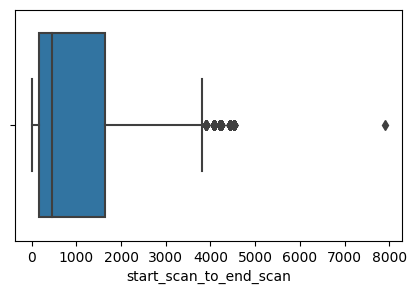

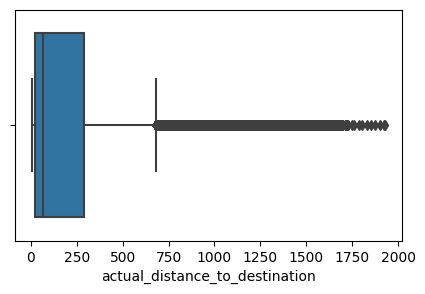

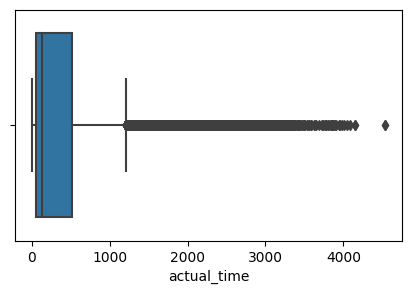

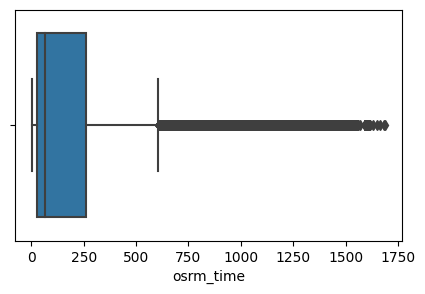

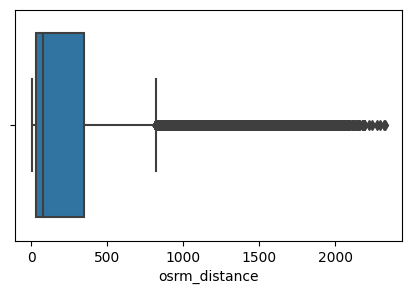

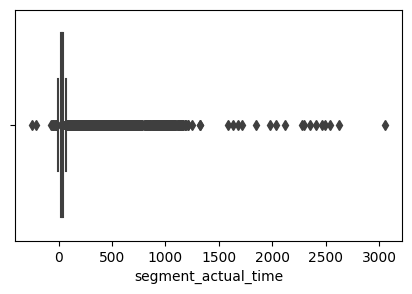

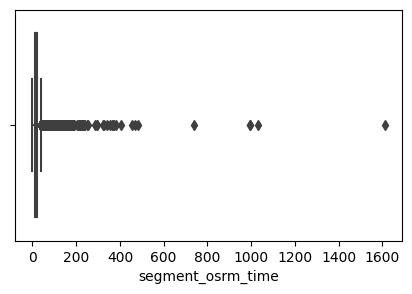

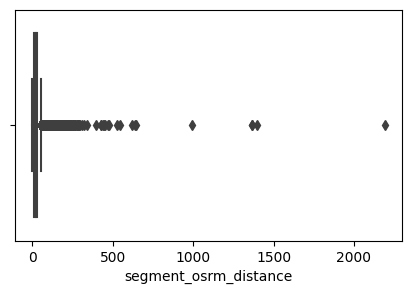

In [546]:
#plotting boxplot for all the numerical columns to see if outliers exists
for col in numerical_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x=col)
    plt.show()

- we can see that there are a lot of outliers present in the dataset. We will handle the outliers later.

### UNIVARIATE AND BIVARIATE ANALYSIS

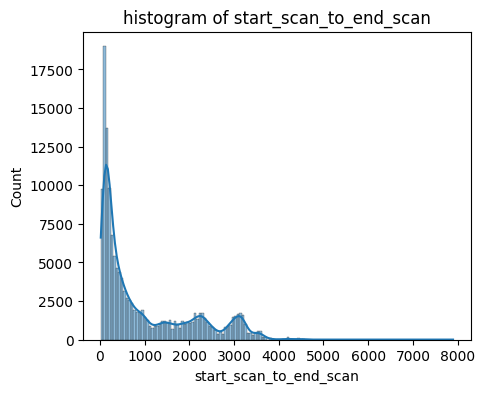

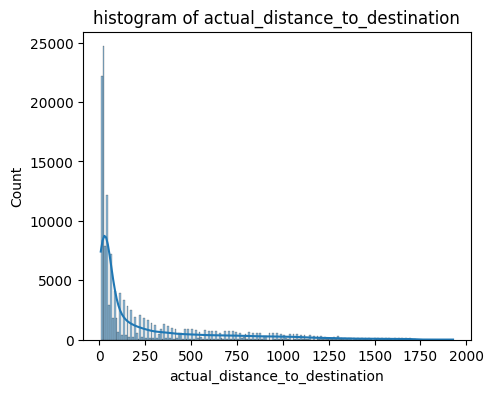

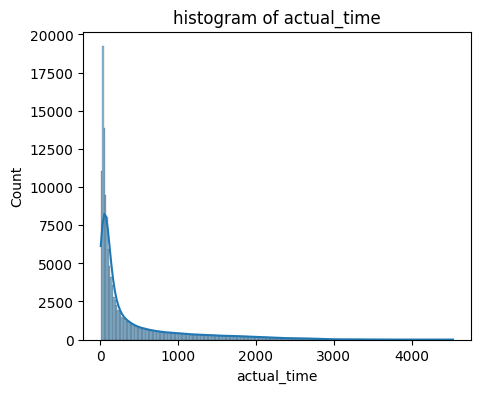

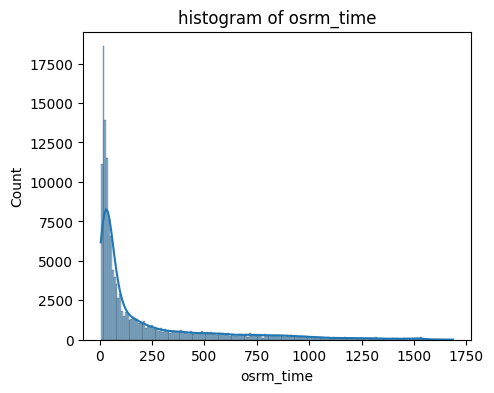

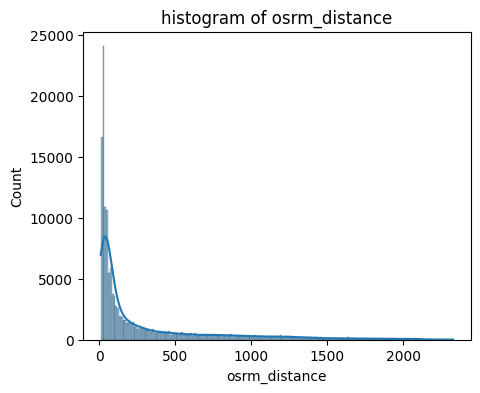

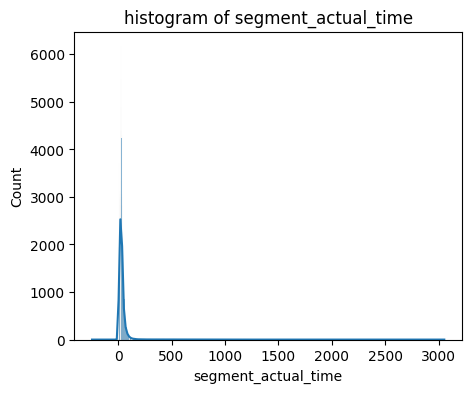

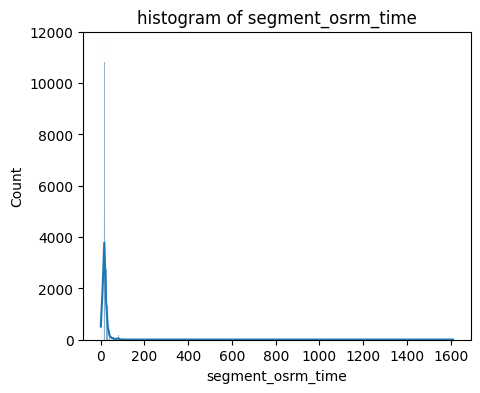

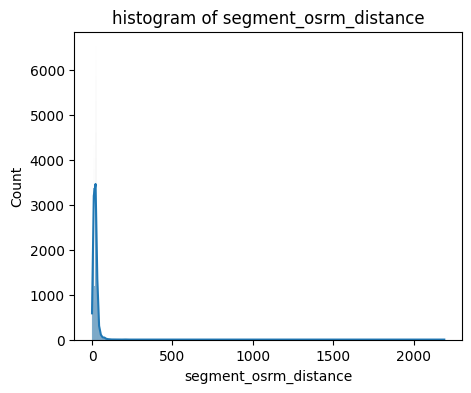

In [549]:
def dist_plot(col):
    plt.figure(figsize=(5,4))
    sns.histplot(x=df[col], kde=True)
    plt.title(f'histogram of {col}')
    plt.show()

for col in numerical_cols:
    dist_plot(col)

- From the above plots, we can see that our data is highly **right skewed**.

#### UNIVARIATE ANALYISIS BETWEEN CATEGORICAL VARIABLES

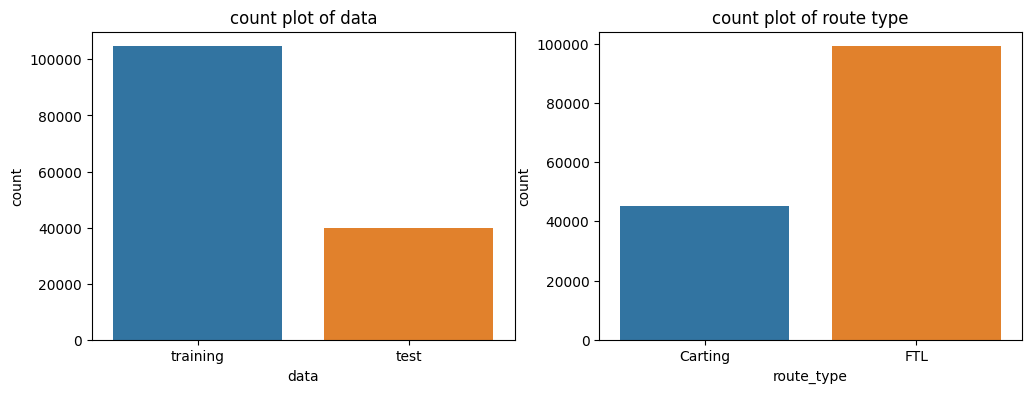

In [550]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data=df, x='data')
plt.title('count plot of data')

plt.subplot(1,2,2)
sns.countplot(data=df, x='route_type')
plt.title('count plot of route type')
plt.show()



1. **Data:** We have more training data than test data. Which is a standard practice to follow when working on Machine Learning model to train the model on huge data.

2. **Route Type:** We have more shipments going through FTL(Full Truck Load) than carting. This ensures faster delivery, as the truck is making no other pickups or drop-offs along the way.

### COMPARISON & VISUALIZATION OF TIME AND DISTANCE FIELDS

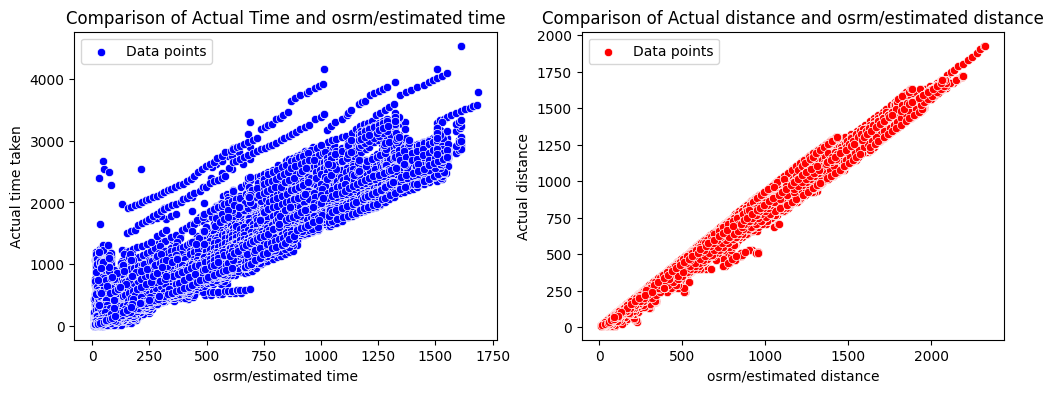

In [551]:
plt.figure(figsize=(12, 4))  

plt.subplot(1,2,1)
sns.scatterplot(y='actual_time', x='osrm_time', data=df, color='blue', label='Data points')
plt.ylabel('Actual time taken')
plt.xlabel('osrm/estimated time')
plt.title('Comparison of Actual Time and osrm/estimated time')

plt.subplot(1,2,2)
sns.scatterplot(y='actual_distance_to_destination', x='osrm_distance', data=df, color='red', label='Data points')
plt.ylabel('Actual distance')
plt.xlabel('osrm/estimated distance')
plt.title('Comparison of Actual distance and osrm/estimated distance')

plt.show()

- We can see a linear relationship between estimated time and actual time. Although for most of the estimated time points, the corresponding actual time is higher than estimated time. 

- We can see a linear relationship between estimated distance and actual distance. Although for most of the estimated distance points, the corresponding actual distance is lower than estimated distance. 

### FEATURE CREATION

1. duration: time between 'od_end_time' and od_start_time' to get the duration of trip start and end time.
2. Source Name: Split and extract features out of destination. City-place-code (State)
3. Destination Name: Split and extract features out of destination. City-place-code (State)
4. Trip_creation_time: Extract features like month, year and day etc

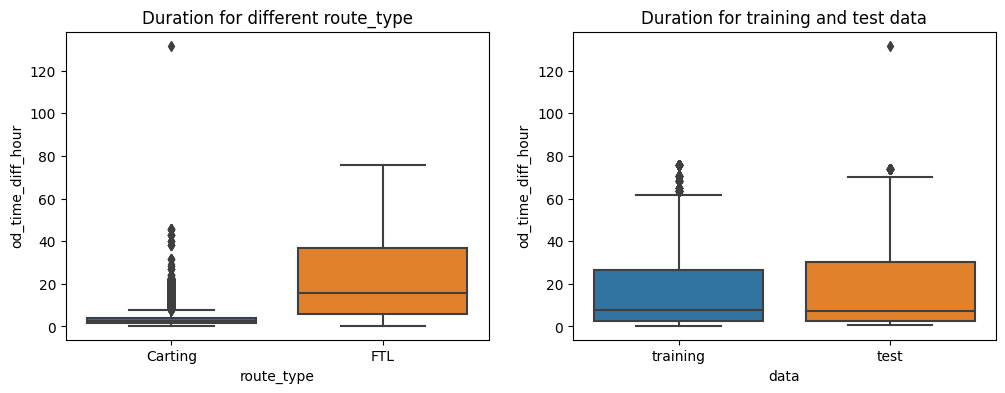

In [552]:
plt.figure(figsize=(12,4))
df['od_time_diff_hour'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600 #Total duration in hours
df = df.drop(['od_end_time','od_start_time'], axis=1)   #dropping original columns

plt.subplot(1,2,1)
sns.boxplot(data=df,y= 'od_time_diff_hour', x='route_type')
plt.title('Duration for different route_type')

plt.subplot(1,2,2)
sns.boxplot(data=df,y= 'od_time_diff_hour', x='data')
plt.title('Duration for training and test data')
plt.show()

In [553]:
# extracting source city, place, code and state
pattern = r'(?P<s_city>[\w]+)_(?P<s_place>[\w]+)_(?P<s_code>[\w]+)\s\((?P<s_state>[\w]+)\)'

df_extracted = df['source_name'].str.extract(pattern)
df = pd.concat([df, df_extracted], axis=1)

# extracting destination city, place, code and state
pattern = r'(?P<d_city>[\w]+)_(?P<d_place>[\w]+)_(?P<d_code>[\w]+)\s\((?P<d_state>[\w]+)\)'

df_extracted = df['destination_name'].str.extract(pattern)
df = pd.concat([df, df_extracted], axis=1)

In [554]:
df['day_trip_created'] = df['trip_creation_time'].dt.day
df['month_trip_created'] = df['trip_creation_time'].dt.month
df['year_trip_created'] = df['trip_creation_time'].dt.year

In [555]:
df['s_state'].nunique(),df['d_state'].nunique(),

(22, 22)

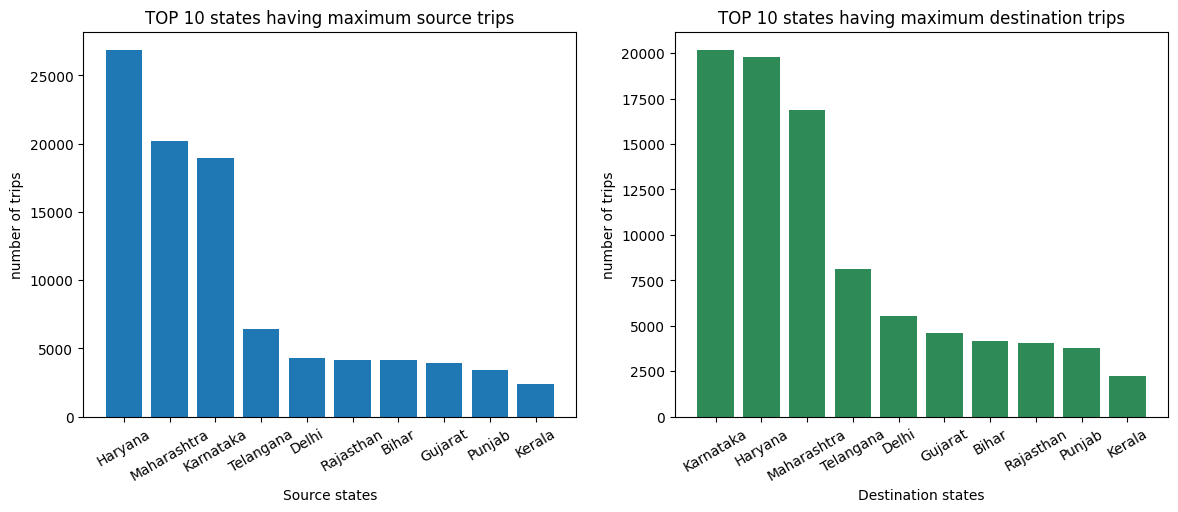

In [556]:
top_source_states = df['s_state'].value_counts()[0:10]
top_destination_states = df['d_state'].value_counts()[0:10]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5)) #createing sub plot

x = top_source_states.index
y = top_source_states
ax[0].bar(x,y) #bar plot
ax[0].set_title("TOP 10 states having maximum source trips")
ax[0].set_xlabel("Source states")
ax[0].set_ylabel("number of trips")
ax[0].tick_params(axis='x', rotation=30)

x = top_destination_states.index
y = top_destination_states
ax[1].bar(x,y,color='seagreen')
ax[1].set_title("TOP 10 states having maximum destination trips")
ax[1].set_xlabel("Destination states")
ax[1].set_ylabel("number of trips")
ax[1].tick_params(axis='x', rotation=30)
plt.show()

- From the above plots, we can see that:
    - Busiest Source states: Haryana, Maharashtra, Karnataka
    - Busiest Destination states: Karnataka, Haryana, Maharashtra

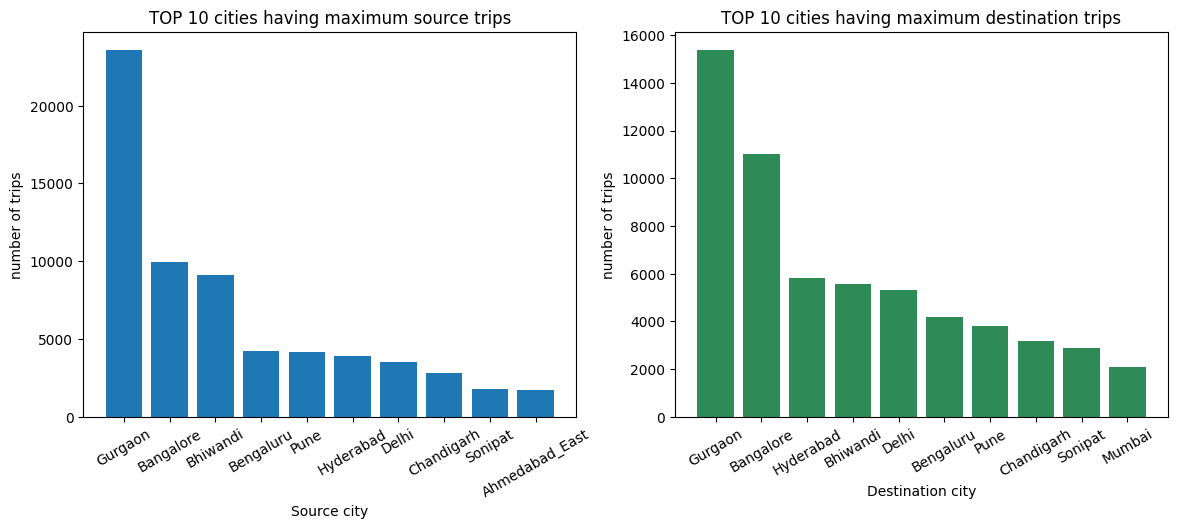

In [557]:
top_source_city = df['s_city'].value_counts()[0:10]
top_destination_city = df['d_city'].value_counts()[0:10]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5)) #createing sub plot

x = top_source_city.index
y = top_source_city
ax[0].bar(x,y) #bar plot
ax[0].set_title("TOP 10 cities having maximum source trips")
ax[0].set_xlabel("Source city")
ax[0].set_ylabel("number of trips")
ax[0].tick_params(axis='x', rotation=30)

x = top_destination_city.index
y = top_destination_city
ax[1].bar(x,y,color='seagreen')
ax[1].set_title("TOP 10 cities having maximum destination trips")
ax[1].set_xlabel("Destination city")
ax[1].set_ylabel("number of trips")
ax[1].tick_params(axis='x', rotation=30)
plt.show()

- From the above plots, we can see that:
    - Busiest Source cities: Gurgaon, Bangalore, Bhiwandi
    - Busiest Destination cities: Gurgaon, Bangalore, Hyderabad

#### BUSIEST STATES ROUTE

In [558]:
busiest_state_route = df.groupby(['s_state','d_state'])['trip_uuid'].size().reset_index(name='count')
busiest_route = busiest_state_route.loc[busiest_state_route['count'].idxmax()]
print(f'The busiest route between state is between {busiest_route[0]} and {busiest_route[1]} with total {busiest_route[2]} trips.')

The busiest route between state is between Karnataka and Karnataka with total 9724 trips.


#### BUSIEST CITIES ROUTE

In [559]:
busiest_city_route = df.groupby(['s_city','d_city'])['trip_uuid'].size().reset_index(name='count')
busiest_route = busiest_city_route.loc[busiest_city_route['count'].idxmax()]
print(f'The busiest route between cities is between {busiest_route[0]} and {busiest_route[1]} with total {busiest_route[2]} trips.')

The busiest route between cities is between Gurgaon and Bangalore with total 4976 trips.


#### BUSIEST CORRIDOR ROUTE

In [560]:
busiest_corridor_route = df.groupby(['s_city','s_place','s_code','s_state','d_city','d_place','d_code','d_state'])['trip_uuid'].size().reset_index(name='count')
busiest_route = busiest_corridor_route.loc[busiest_corridor_route['count'].idxmax()]
print(f'The busiest corridor is between {busiest_route[0]}_{busiest_route[1]}_{busiest_route[2]}_{busiest_route[3]} and {busiest_route[4]}_{busiest_route[5]}_{busiest_route[6]}_{busiest_route[7]} with total {busiest_route[8]} trips.')

The busiest corridor is between Gurgaon_Bilaspur_HB_Haryana and Bangalore_Nelmngla_H_Karnataka with total 4976 trips.


#### DISTANCE BETWEEN BUSIEST ROUTE

In [561]:
x = df.groupby(['s_city','s_place','s_code','s_state','d_city','d_place','d_code','d_state'])['actual_distance_to_destination'].last().reset_index(name='distance')

busiest_corridor_distance = x[(x['s_city']==busiest_route[0]) & (x['s_place']==busiest_route[1]) & (x['s_code']==busiest_route[2]) & (x['s_state']==busiest_route[3]) & (x['d_city']==busiest_route[4]) & (x['d_place']==busiest_route[5]) & (x['d_code']==busiest_route[6]) & (x['d_state']==busiest_route[7])]
print(f'The distance between busiest corridor(Gurgaon_Bilaspur_HB_Haryana and Bangalore_Nelmngla_H_Karnataka) is {round(busiest_corridor_distance.distance.values[0], 2)}kms')

The distance between busiest corridor(Gurgaon_Bilaspur_HB_Haryana and Bangalore_Nelmngla_H_Karnataka) is 1689.64kms


### MERGING OF ROWS AND AGGREGATION OF FIELDS

Dataset contains cumulative values few numerical columns. Let's group by columns 'trip_uuid','source_center','destination_center' and find the last value(cumulative sum value) 

- First, let's group the data by 'trip_uuid','source_center' and 'destination_center',
- Aggregation details:
    - source_name: taking the first value
    - destination_name: taking the last value 
    - start_scan_to_end_scan: taking the first value
    - 'actual_distance_to_destination':taking the last value ,
    - 'actual_time':taking the last value 
    - 'osrm_time':'taking the last value 
    - 'osrm_distance':taking the last value 
    - 'segment_actual_time':taking the sum value
    - 'segment_osrm_time':taking the sum value
    - 'segment_osrm_distance': taking the sum value

In [562]:
df1 = df.groupby(['trip_uuid','source_center','destination_center']).agg({
    'data':'first',
    'trip_creation_time':'first', 
    'route_schedule_uuid':'first', 'route_type':'first',
    'source_name': 'first',
    'destination_name':'last',
    'start_scan_to_end_scan': 'first',
    'actual_distance_to_destination':'last',
    'actual_time':'last',  
    'osrm_time':'last',
    'osrm_distance':'last',
    'segment_actual_time':'sum', 
    'segment_osrm_time':'sum',
    'segment_osrm_distance':'sum',
    'od_time_diff_hour':'last', 
    's_city': 'first', 's_place': 'first', 's_code': 'first','s_state': 'first',
    'd_city': 'last', 'd_place': 'last', 'd_code': 'last', 'd_state': 'last',
    'day_trip_created': 'first', 'month_trip_created': 'first','year_trip_created': 'first'
}).reset_index()

In [563]:
df1.shape

(26222, 29)

**After merging the data we have reduced the size of dataset to 26,222 rows**

In [564]:
df1.head()

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,s_city,s_place,s_code,s_state,d_city,d_place,d_code,d_state,day_trip_created,month_trip_created,year_trip_created
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,21.010074,None,None,None,None,Gurgaon,Bilaspur,HB,Haryana,12,9,2018
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,16.658423,None,None,None,None,None,None,None,None,12,9,2018
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,0.980540,Doddablpur,ChikaDPP,D,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,12,9,2018
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,2.046325,Tumkur,Veersagr,I,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,12,9,2018
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,13.910649,Gurgaon,Bilaspur,HB,Haryana,Chandigarh,Mehmdpur,H,Punjab,12,9,2018


- Now we have eliminated all the duplicate rows for trip_uuid, and have got the aggregated values 
  for each group of 'trip_uuid','source_center','destination_center'.
- Now since we want to understand the overall picture of how is the platform performing in delivering
  the package from a source to destination, we need to group the rows by 'trip_uuid' and get the aggregated values
  for each trip_uuid
  
**- For this, we will group by 'trip_uuid' and get the aggregated values like:**
   - 'first' value for 'source_center' and 'last' value for 'destination_center'
   - 'sum' of the values for features like 'actual_time', 'actual_distance', 'osrm_time' etc

In [565]:
df2 = df1.groupby('trip_uuid').agg({
    'data':'first',
    'trip_creation_time':'first', 
    'route_schedule_uuid':'first', 'route_type':'first',
    'source_center':'first',
    'destination_center':'last',
    'source_name': 'first',
    'destination_name':'last',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination':'sum',
    'actual_time':'sum',
    'osrm_time':'sum',
    'osrm_distance':'sum',
    'segment_actual_time':'sum', 
    'segment_osrm_time':'sum',
    'segment_osrm_distance':'sum',
    'od_time_diff_hour':'sum', 
    's_city': 'first', 's_place': 'first', 's_code': 'first','s_state': 'first',
    'd_city': 'last', 'd_place': 'last', 'd_code': 'last', 'd_state': 'last',
    'day_trip_created': 'first', 'month_trip_created': 'first','year_trip_created': 'first'
}).reset_index()

In [566]:
df2.shape

(14787, 29)

**After merging the data just by 'trip_uuid', we have reduced the size of dataset to 14,787 rows**

In [567]:
df2.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,destination_center,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,s_city,s_place,s_code,s_state,d_city,d_place,d_code,d_state,day_trip_created,month_trip_created,year_trip_created
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497,None,None,None,None,Gurgaon,Bilaspur,HB,Haryana,12,9,2018
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,12,9,2018
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,65.572709,Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,HB,Haryana,12,9,2018
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,1.674916,None,None,None,None,Mumbai,MiraRd,IP,Maharashtra,12,9,2018
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,IND583119AAA,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,11.972484,Sandur,WrdN1DPP,D,Karnataka,Sandur,WrdN1DPP,D,Karnataka,12,9,2018


- Now, we have a unique row for each trip_uuid, with the first source point, final destination point, total time taken,
    total distance travelled and other aggregated values corresponding to it.
- We have also reduced the data size having clean and sensible data obtained from raw data

### IN-DEPTH ANALYSIS AND HYPOTHESIS TESTING OF AGGREGATED FIELDS

- Let's compare the columns like  'actual_time', 'osrm_time' and 'actual_distance_to_destination','osrm_distance' to analyze how delhivery platform is performing
- For In-depth analysis, we will do:
    1. Statistical analysis
    2. Visual analysis
    3. Hypothesis testing

In [568]:
df2.columns

Index(['trip_uuid', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'source_center', 'destination_center', 'source_name',
       'destination_name', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'od_time_diff_hour', 's_city', 's_place',
       's_code', 's_state', 'd_city', 'd_place', 'd_code', 'd_state',
       'day_trip_created', 'month_trip_created', 'year_trip_created'],
      dtype='object')

In [569]:
# taking only the columns required for analysis
data = df2[['trip_uuid','source_center', 'source_name', 'destination_center','destination_name',
            'start_scan_to_end_scan','actual_distance_to_destination', 'actual_time','osrm_time',
             'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']]

#### 1. STATISTICAL SUMMARY

In [570]:
data.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000
mean,529.429025,164.090196,356.306012,160.990938,203.887411,353.059174,180.511598,222.705466
std,658.254936,305.502982,561.517936,271.459495,370.565564,556.365911,314.679279,416.846279
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900
25%,149.000000,22.777099,67.000000,29.000000,30.756900,66.000000,30.000000,32.578850
50%,279.000000,48.287894,148.000000,60.000000,65.302800,147.000000,65.000000,69.784200
75%,632.000000,163.591258,367.000000,168.000000,206.644200,364.000000,184.000000,216.560600
max,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400


- **comparison between osrm_time (estimated delivery time) and actual_time (actual delivery time):**
    - mean of osrm_time: 160.99 mins
    - mean of actual_time: 356.30 mins
    
(mean values for both the columns are far apart. We can see that, on an average, actual_time is higher than the osrm/estimated delivery time.)

**_______________________________________________________________________________________________________________________**
  
- **comparison between osrm_distance (estimated delivery distance) and actual_distance_to_destination (actual delivery distance) :**
    - mean of osrm_distance: 203.88 km
    - mean of actual_distance_to_destination: 164.09 km

(mean values for both the columns are far apart. We can see that, on an average, actual_distance_to_destination is less than the osmr/estimated delivery distance.)

**_______________________________________________________________________________________________________________________**

- **comparison between actual_time (actual delivery time) and segment_actual_time (sum of in-between delivery time):**
    - mean of actual_time: 356.30 mins
    - mean of segment_actual_time: 353.06 mins
    
(mean values for both the columns are close to each other)

**_______________________________________________________________________________________________________________________**
  
- **comparison between osrm_distance (estimated delivery distance) and segment_osrm_distance (sum of in-between delivery distance) :**
    - mean of osrm_distance: 203.88 km
    - mean of segment_osrm_distance: 222.70 km
    
(mean values for both the columns do not have large difference)

**_______________________________________________________________________________________________________________________**

- **comparison between start_scan_to_end_scan and actual_time:**
     - mean of start_scan_to_end_scan: 529.42 mins
     - mean of actual_time: 356.30 mins

#### 2. VISUAL ANALYSIS

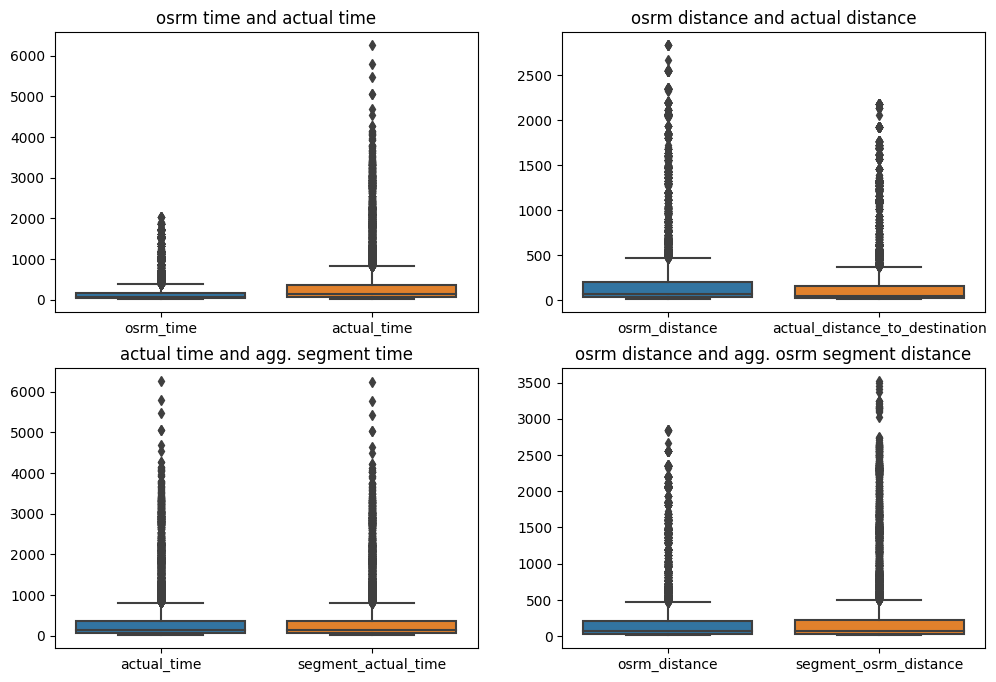

In [571]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(data=data[['osrm_time', 'actual_time']])
plt.title('osrm time and actual time')

plt.subplot(2,2,2)
sns.boxplot(data=data[['osrm_distance', 'actual_distance_to_destination']])
plt.title('osrm distance and actual distance')

plt.subplot(2,2,3)
sns.boxplot(data=data[['actual_time', 'segment_actual_time']])
plt.title('actual time and agg. segment time')

plt.subplot(2,2,4)
sns.boxplot(data=data[['osrm_distance', 'segment_osrm_distance']])
plt.title('osrm distance and agg. osrm segment distance')
plt.show()

- From the boxplots, we can see that:
    - mean value of actual time is greater than mean value of osrm time.
    - mean value of actual distance is less than osrm distance.
    - mean values of actual and segment time are very close.
    - mean values of osrm and segment distance are close.


#### 3. HYPOTHESIS TESTING

- Hypothesis testing parameters:
    - determine whether there is a significant difference between the means of the two groups.
    - null hypothesis: H0: means are equal
    - alternate hypothesis: Ha: means are unequal
    - alpha: 0.05

In [572]:
alpha = 0.05 #taking 95% confidence interval

1. Taking the **'osrm_time'** and **'actual_time'** of a package from a source to destination

In [573]:
stat, p = ttest_ind(data['osrm_time'],data['actual_time'])
print(f'p value: {p}')
if(p<alpha):
    print('reject null hypothesis: mean values of estimated delivery time and actual delivery time are not equal.')
else:
    print('fail to reject null hypothesis: means values of estimated delivery time and actual delivery time are equal.')

p value: 8.2146191343466e-310
reject null hypothesis: mean values of estimated delivery time and actual delivery time are not equal.


- From statistical analysis, we saw that mean of osrm_time < mean of actual_time, so, we can also have another null and alternative hypothesis as:
    - H0: means are equal
    - Ha: mean of osrm_time < mean of actual_time
    
Let's see if this hypothesis holds true:

In [574]:
stat, p = ttest_ind(data['osrm_time'],data['actual_time'], alternative='less')
print(f'p value: {p}')
if(p<alpha):
    print('reject null hypothesis: mean of osrm_time < mean of actual_time')
else:
    print('fail to reject null hypothesis: means values of estimated delivery time and actual delivery time are equal.')

p value: 4.1073095671733e-310
reject null hypothesis: mean of osrm_time < mean of actual_time


2. Taking **osrm_distance** and **actual_distance_to_destination** values to compare

In [575]:
stat, p = ttest_ind(data['osrm_distance'],data['actual_distance_to_destination'])
print(f'p value: {p}')
if(p<alpha):
    print('reject null hypothesis: mean values of estimated delivery distance and actual delivery distance are not equal.')
else:
    print('fail to reject null hypothesis:mean values of estimated delivery distance and actual delivery distance are equal.')

p value: 7.65905658899532e-24
reject null hypothesis: mean values of estimated delivery distance and actual delivery distance are not equal.


In [576]:
stat, p = ttest_ind(data['osrm_distance'],data['actual_distance_to_destination'], alternative='greater')
print(f'p value: {p}')
if(p<alpha):
    print('reject null hypothesis: mean of osrm_distance > mean of actual_distance_to_destination')
else:
    print('fail to reject null hypothesis:mean values of estimated delivery distance and actual delivery distance are equal.')

p value: 3.82952829449766e-24
reject null hypothesis: mean of osrm_distance > mean of actual_distance_to_destination


3. Taking **actual_time** and **segment_actual_time** values to compare

In [577]:
stat, p = ttest_ind(data['segment_actual_time'],data['actual_time'])
print(f'p value: {p}')
if(p<alpha):
    print('reject null hypothesis: mean values of actual_time and segment_actual_time are not equal.')
else:
    print('fail to reject null hypothesis: mean values of actual_time and segment_actual_time are equal.')

p value: 0.6174479719707524
fail to reject null hypothesis: mean values of actual_time and segment_actual_time are equal.


4. Taking **osrm_distance** and **segment_osrm_distance** values to compare 

In [578]:
stat, p = ttest_ind(data['segment_osrm_distance'],data['osrm_distance'])
print(f'p value: {p}')
if(p<alpha):
    print('reject null hypothesis: means of segment_osrm_distance and osrm_distance are not equal.')
else:
    print('fail to reject null hypothesis: means of segment_osrm_distance and osrm_distance are equal.')

p value: 4.092957819120332e-05
reject null hypothesis: means of segment_osrm_distance and osrm_distance are not equal.


In [579]:
stat, p = ttest_ind(data['segment_osrm_distance'],data['osrm_distance'], alternative='greater')
print(f'p value: {p}')
if(p<alpha):
    print('reject null hypothesis: mean of segment_osrm_distance > mean of osrm_distance')
else:
    print('fail to reject null hypothesis: means of segment_osrm_distance and osrm_distance are equal.')

p value: 2.046478909560166e-05
reject null hypothesis: mean of segment_osrm_distance > mean of osrm_distance


5. Hypothesis testing between **start_scan_to_end_scan** and **actual_time** values

In [580]:
stat, p = ttest_ind(data['start_scan_to_end_scan'],data['actual_time'], alternative='greater')
print(f'p value: {p}')
if(p<alpha):
    print('reject null hypothesis: mean value of start_scan_to_end_scan > mean of actual_delivery_time.')
else:
    print('fail to reject null hypothesis: mean values of start_scan_to_end_scan and actual_delivery_time  are equal.')

p value: 8.550982839644418e-130
reject null hypothesis: mean value of start_scan_to_end_scan > mean of actual_delivery_time.


From the plots that we saw above, we can say that outliers exists in dataset. Let's remove outliers using IQR method
### OUTLIER TREATMENT - IQR METHOD

In [581]:
numerical_cols = [col for col in df2.columns if df2[col].dtype in ['int64', 'float64']]
print(numerical_cols)

['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'od_time_diff_hour']


In [582]:
#defining a method to remove outliers from numerical columns
def iqr_method(col,df_out, multiplier):    
    q1 = df_out[col].quantile(0.25) 
    q3 = df_out[col].quantile(0.75)
    iqr = q3-q1
    
    lb = q1 - (iqr*multiplier)
    ub = q3 + (iqr*multiplier)
    
    outlier = df_out[(df_out[col]>=lb) & (df_out[col]<=ub)]
    return outlier

df_out = df2.copy()
for col in numerical_cols:
    df_out = iqr_method(col, df_out, 2)

In [583]:
df_out.shape

(11496, 29)

In [584]:
len(df_out)/len(df2)

0.7774396429296003

- 77% of data is left with us after outlier removal

### HANDLING CATEGORICAL VARIABLES: ONE HOT ENCODING

In [585]:
cat_cols = [col for col in df_out.columns if df_out[col].dtype in ['object']]
print(cat_cols)

['trip_uuid', 'data', 'route_schedule_uuid', 'route_type', 'source_center', 'destination_center', 'source_name', 'destination_name', 's_city', 's_place', 's_code', 's_state', 'd_city', 'd_place', 'd_code', 'd_state']


In [586]:
# initializing one hot encoder
ohe = OneHotEncoder(sparse_output=False,drop='first')
# creating one hot encoded array from category columns
enc_array = ohe.fit_transform(df_out[cat_cols])
# getting feature names
enc_feat_names = ohe.get_feature_names_out(cat_cols)
#creating dataframe with encoded values
enc_df = pd.DataFrame(enc_array, columns = enc_feat_names)
#concatenating encoded and original dataframes
df_new = pd.concat([df_out.reset_index(drop=True),enc_df.reset_index(drop=True)], axis=1)
#dropping the category columns 
df_new.drop(cat_cols, inplace=True, axis=1)

In [587]:
df_new.shape

(11496, 18219)

### HANDLING NUMERICAL COLUMNS: NORMALIZATION

- Since our features have skewed distributions(as seen in boxplot and histogram), we will use normalization
  to bring out data between [0,1].
  
  

In [589]:
scaler = MinMaxScaler()

In [590]:
numerical_cols.extend(['day_trip_created', 'month_trip_created', 'year_trip_created'])
print(numerical_cols)

['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'od_time_diff_hour', 'day_trip_created', 'month_trip_created', 'year_trip_created']


In [591]:
df_new[numerical_cols] = scaler.fit_transform(df_new[numerical_cols])

In [592]:
df_new.shape

(11496, 18219)

#### Now, our dataset is clean and pre-processed. This dataset can be used by data scientists at delhivery for their forecasting model. 

### BUSINESS INSIGHTS

**1. Route type:** 
- The analysis reveals that a higher proportion of shipments are routed through Full Truck Load (FTL) as opposed to carting. This has important implications for the efficiency and speed of the delivery process.

**2. Geographical Focus: Finding Busiest routes**

Understanding the busiest routes and distances can help in optimizing logistics operations, improving transportation efficiency, and potentially reducing costs.

**a. State:** The states of Haryana, Maharashtra, and Karnataka are not only busy source states but also emerge as the busiest source states, indicating a high demand or significant business activities originating from these regions.

**b. source city:** Gurgaon, Bangalore, and Bhiwandi are identified as the busiest source cities, suggesting that these cities play a crucial role in contributing to the overall business operations or transportation activities.

**c. destination city:** Gurgaon, Bangalore, and Hyderabad are identified as the busiest destination cities, underscoring their significance in terms of business activities or population movement.

**d. Busiest corridor:** Overall, the busiest corridor is Gurgaon_Bilaspur_HB_Haryana and Bangalore_Nelmngla_H_Karnataka which has the maximum trips.

**Distance Analysis:** The distance between the busiest corridor (Gurgaon_Bilaspur_HB_Haryana and Bangalore_Nelmngla_H_Karnataka) is approximately 1689.64 kilometers. This information can be used for fuel efficiency planning, cost estimation, and route optimization.

**3. Delivery Time & Distance Accuracy:**

**a. OSRM Time vs. Actual Time:**
- The difference between the mean values of estimated delivery time and actual delivery time suggests that there may be variations or delays in the actual delivery process compared to the initial estimates.
- The fact that the mean of OSRM time is less than the mean of actual delivery time indicates that the estimated times provided by the OSRM (Open Source Routing Machine) service tend to be optimistic. 

**b. OSRM Distance vs. Actual Distance:**
- The mean of OSRM distance being greater than the mean of actual distance to the destination suggests that the OSRM might overestimate the distances. This could impact route planning and fuel efficiency calculations.

**c. Segment-wise time Analysis:**
- The equality in the mean values of actual time and segment actual time suggests that the time measurements are consistent across different segments of the delivery process

**d. Segment-wise distance Analysis:**
- The mean of segment OSRM distance being greater than the mean of OSRM distance implies that the OSRM might provide more conservative estimates for distance within individual segments. 

**e. Start-to-End Scan Time:**
- The mean value of start_scan_to_end_scan being greater than the mean of actual delivery time suggests that there are additional processes or delays between the start and end scan points. Identifying and addressing the factors contributing to this time difference could lead to more efficient operations and potentially faster deliveries.



### RECOMMENDATION:

**1. Route Optimization:**
   - Given that the busiest state route is within Karnataka, it might be beneficial to optimize the transportation network within Karnataka to improve efficiency and reduce congestion. Consider implementing route optimization algorithms and real-time traffic monitoring to enhance the transportation system.
   - Since Gurgaon and Bangalore are identified as the busiest source and destination cities, respectively, focus on city-specific strategies to manage the high traffic volume. 
   

**2. Operational Efficiency:**
   - Since mean of OSRM time is less than the mean of actual delivery time, Businesses could use this insight to set more realistic delivery time expectations for customers.
   - Since the mean of OSRM distance greater than the mean of actual distance, Businesses should consider adjusting their distance estimations for more accurate logistics planning.
   - Since the mean of segment OSRM distance greater than the mean of OSRM distance, along with this, we have the actual distance travelled, Businesses can use this information to fine-tune their route planning and optimize segment-specific logistics.
   - Implement advanced demand forecasting techniques to anticipate peak travel times and adjust transportation services accordingly. This proactive approach can help in better resource allocation and minimize the impact of congestion during peak hours.
   - Overall, the analysis hints at potential areas for operational improvement. Businesses could focus on refining their route planning algorithms, addressing discrepancies in estimated times and distances, and streamlining processes between different stages of delivery to enhance overall operational efficiency.
 
 
**3. Customer Satisfaction:**
   - Improving accuracy in estimated delivery times and distances can contribute to increased customer satisfaction. 
   - FTL shipments: Faster delivery times, facilitated by a higher proportion of FTL shipments, can directly impact customer satisfaction. Customers typically value timely deliveries, and this strategic choice aligns with meeting or exceeding customer expectations in terms of shipment speed.
    
    
**4. Cost Optimization:**
   - Understanding the differences in estimated and actual times and distances can aid in cost optimization efforts. 
   - Fine-tuning logistics planning based on more accurate measurements can lead to better resource allocation and potentially reduce operational costs.
    

**5. Strategic Decision-making:**
   - The preference for FTL over carting reflects a strategic decision by the logistics management. 
   - Understanding the reasons behind this choice and continuously evaluating its impact can guide future decision-making processes and help adapt to evolving business needs.
     
**6. Collaboration with Stakeholders:**
   - Collaborate with relevant stakeholders, including government authorities, transportation companies, and local communities, to develop and implement comprehensive strategies for managing and optimizing transportation in the identified busy corridors and cities.

**7. Training and Skill Development:**
   - Invest in training programs for drivers and logistics personnel to enhance their skills in navigating busy routes and handling transportation challenges. Skilled and well-trained staff can contribute to the overall efficiency of the transportation system.
 
**8. Continuous Monitoring and Analysis:**
   - Establish a system for continuous monitoring and analysis of transportation data. Regularly assess the effectiveness of implemented strategies and be agile in adapting to changing traffic patterns and demands.